# Working With Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import tensorflow as tf
%matplotlib inline

# Pandas!

## DataFrame

In [112]:
s = pd.Series(np.random.rand(20))
s

0     0.088114
1     0.407038
2     0.759186
3     0.635809
4     0.570806
5     0.137096
6     0.120503
7     0.701027
8     0.446805
9     0.417156
10    0.863950
11    0.040791
12    0.640582
13    0.070856
14    0.011636
15    0.975816
16    0.047596
17    0.137883
18    0.435957
19    0.326004
dtype: float64

In [9]:
print(s.index)
print(s.values)

RangeIndex(start=0, stop=20, step=1)
[ 0.5206791   0.46713023  0.72747643  0.13477516  0.8369139   0.97590977
  0.40017438  0.67559899  0.55187907  0.28172635  0.94498738  0.45770794
  0.32254568  0.6693352   0.66279005  0.10255661  0.60268569  0.44172566
  0.90041708  0.94223578]


In [10]:
s.describe()

count    20.000000
mean      0.580963
std       0.261670
min       0.102557
25%       0.431338
50%       0.577282
75%       0.754836
max       0.975910
dtype: float64

In [110]:
df = pd.DataFrame({'ser1': s, 'ser2': np.random.randn(20)})
df.head()

,ser1,ser2
0,0.520679,-0.007865
1,0.467130,-0.027841
2,0.727476,-0.652421
3,0.134775,-1.365230
4,0.836914,-0.528210


In [13]:
df.describe()

,ser1,ser2
count,20.000000,20.000000
mean,0.580963,-0.114112
std,0.261670,0.925484
min,0.102557,-1.677225
25%,0.431338,-0.759942
50%,0.577282,-0.369342
75%,0.754836,0.459733
max,0.975910,1.839816


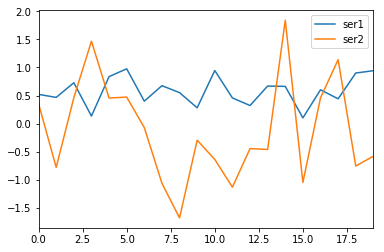

In [16]:
df.plot()

In [23]:
df['ser1']

0     0.520679
1     0.467130
2     0.727476
3     0.134775
4     0.836914
5     0.975910
6     0.400174
7     0.675599
8     0.551879
9     0.281726
10    0.944987
11    0.457708
12    0.322546
13    0.669335
14    0.662790
15    0.102557
16    0.602686
17    0.441726
18    0.900417
19    0.942236
Name: ser1, dtype: float64

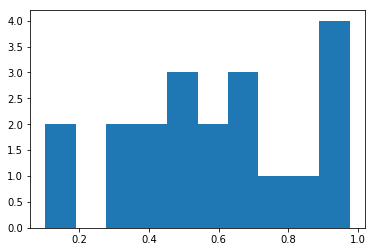

In [25]:
df['ser1'].hist(grid=False);

## Grouping Data

In [16]:
# make some fake data
N = 100
block = np.random.randint(4, size=N)
cmean = np.array([0.1, 0.2, 0.3, 0.4])
cvars = np.array([0.2, 0.1, 0.5, 0.2])
value = cmean[block]+np.random.randn(N)*cvars[block]
df = pd.DataFrame({
    'block': block,
    'value': value
})

In [17]:
df.head(10)

,block,value
0,0,0.302365
1,1,0.161695
2,3,-0.013308
3,1,0.132124
4,0,-0.123105
5,0,0.049604
6,0,-0.064372
7,1,0.101149
8,2,-0.303775
9,3,0.537266


In [18]:
df.groupby('block').size()

block
0    22
1    29
2    24
3    25
dtype: int64

In [19]:
df.groupby('block')['value'].mean()

block
0    0.039905
1    0.156842
2    0.183743
3    0.367526
Name: value, dtype: float64

In [20]:
df.groupby('block')['value'].std()

block
0    0.195009
1    0.103367
2    0.543198
3    0.206642
Name: value, dtype: float64

In [21]:
df.groupby('block')['value'].apply(lambda x: np.mean(np.abs(x-np.mean(x))))

block
0    0.145245
1    0.082275
2    0.448005
3    0.156641
Name: value, dtype: float64

In [22]:
grp = df.groupby('block')['value']
pd.DataFrame({
    'mean': grp.mean(),
    'stdv': grp.std(),
    'absd': grp.apply(lambda x: np.mean(np.abs(x-np.mean(x))))
})

,absd,mean,stdv
block,,,
0,0.145245,0.039905,0.195009
1,0.082275,0.156842,0.103367
2,0.448005,0.183743,0.543198
3,0.156641,0.367526,0.206642


## Time Series

In [67]:
days = pd.date_range('2016-01-01', '2016-12-31', freq='D')
vals = np.cumsum(np.random.randn(len(days)))
df = pd.DataFrame({
    'date': days,
    'price': vals
}).set_index('date')

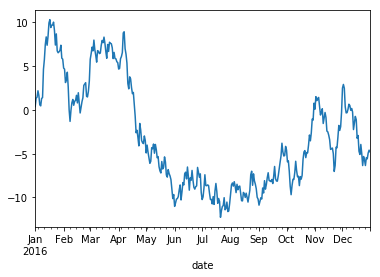

In [68]:
df.plot(legend=False);

In [92]:
df.groupby(pd.TimeGrouper('MS')).std()

,price
date,
2016-01-01,3.365145
2016-02-01,1.528464
2016-03-01,0.822388
2016-04-01,4.223977
2016-05-01,1.636109
2016-06-01,1.236107
2016-07-01,1.149879
2016-08-01,0.918116
2016-09-01,1.840545


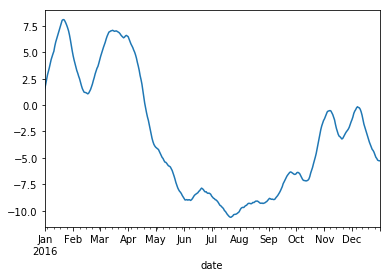

In [102]:
df.rolling(20, center=True, min_periods=1).mean().plot(legend=False);

## Transforming

In [38]:
days = pd.date_range('2006-01-01', '2016-12-31', freq='D')
vals = np.cumsum(np.random.randn(len(days)))
df = pd.DataFrame({
    'date': days,
    'price': vals
}).set_index('date')

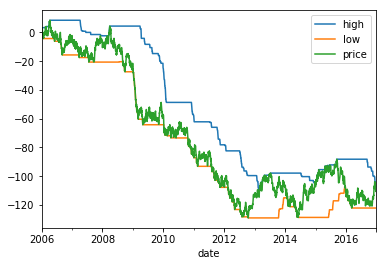

In [39]:
roll = df['price'].rolling(52*7, min_periods=1)
pd.DataFrame({
    'low' : roll.apply(lambda s: s.min()),
    'high': roll.apply(lambda s: s.max()),
    'price': df['price']
}).plot();

## Joining

In [115]:
mapp = pd.Series({x: 2*x for x in range(10)}, name='twox')
mapp

0     0
1     2
2     4
3     6
4     8
5    10
6    12
7    14
8    16
9    18
Name: twox, dtype: int64

In [116]:
init = pd.DataFrame({'ser': np.random.randint(10, size=100)})
init.head()

,ser
0,3
1,7
2,4
3,3
4,4


In [119]:
final = init.join(mapp, on='ser')
final.head()

,ser,twox
0,3,6
1,7,14
2,4,8
3,3,6
4,4,8


In [121]:
final['ratio'] = final['twox']/final['ser']
final.head()

,ser,twox,ratio
0,3,6,2.0
1,7,14,2.0
2,4,8,2.0
3,3,6,2.0
4,4,8,2.0


## Plotting

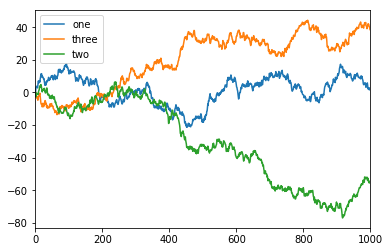

In [8]:
# good way to arrange plots
pd.DataFrame({
    'one': np.cumsum(np.random.randn(1000)),
    'two': np.cumsum(np.random.randn(1000)),
    'three': np.cumsum(np.random.randn(1000))
}).plot();

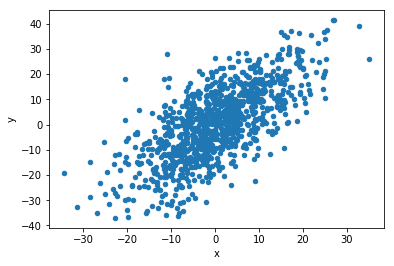

In [567]:
x = 10*np.random.randn(1000)
y = x + 10*np.random.randn(1000)
df = pd.DataFrame({
    'x': x,
    'y': y
})
df.plot.scatter(x='x', y='y');

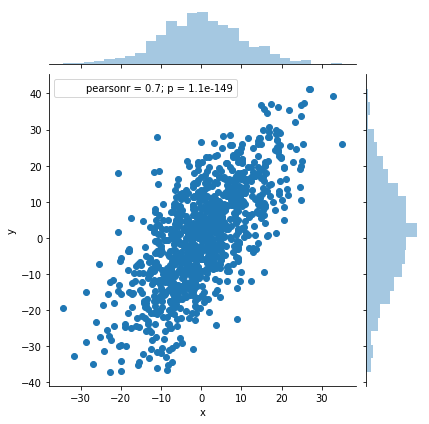

In [568]:
sns.jointplot('x', 'y', data=df);

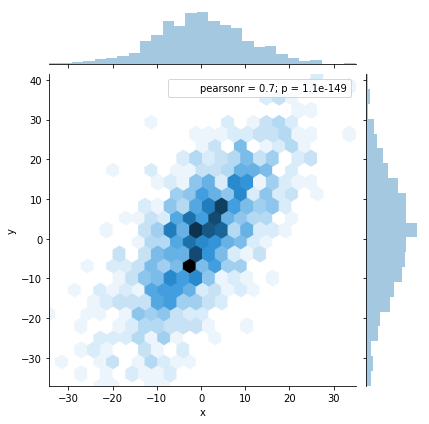

In [569]:
# kind in ['scatter', 'reg', 'resid', 'kde', 'hex']
sns.jointplot('x', 'y', kind='hex', data=df);

## Input/Output

In [1]:
df = pd.DataFrame({
    'one': np.cumsum(np.random.randn(1000)),
    'two': np.cumsum(np.random.randn(1000)),
    'three': np.cumsum(np.random.randn(1000))
})
df.to_csv('test.csv', index=False)

In [4]:
df = pd.read_csv('test.csv')
df.head()

,one,three,two
0,-0.927313,-0.443058,-0.665682
1,-2.597165,-0.873548,0.383420
2,-1.718479,0.249587,1.359553
3,-2.264265,-0.614925,1.078138
4,-1.750190,-0.068286,2.782022


Can also use the many `pd.DataFrame.to_*` and `pd.read_*` function where `*` is one of:
- csv
- excel
- json
- html
- latex
- stata
- sql

# Regressions

## Basic

In [55]:
N = 100
x = np.random.randn(N)
y = 3*np.random.randn(N)
z = 1 + 2*x + 3*y + 4*x*y + np.random.randn(N)
df = pd.DataFrame({
    'x': x,
    'y': y,
    'z': z
})

In [56]:
ret = smf.ols('z ~ 1 + x + y', data=df).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     50.00
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.20e-15
Time:                        21:32:51   Log-Likelihood:                -378.81
No. Observations:                 100   AIC:                             763.6
Df Residuals:                      97   BIC:                             771.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0297      1.124      0.026      0.979      -2.200       2.260
x             -0.0761      1.053     -0.072      0.943      -2.166       2.013
y              3.7700      0.380      9.910      0.000       3.015       4.525
==============================================================================
Omnibus:                       16.139   Durbin-Watson:                   2.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.809
Skew:                          -0.648   Prob(JB):                     5.55e-07
Kurtosis:                       5.288   Cond. No.                         3.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
ret.params

Intercept    0.029666
x           -0.076123
y            3.770009
dtype: float64

In [60]:
ret = smf.ols('z ~ 1 + x*y', data=df).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     6693.
Date:                Wed, 11 Oct 2017   Prob (F-statistic):          2.60e-111
Time:                        21:33:39   Log-Likelihood:                -146.84
No. Observations:                 100   AIC:                             301.7
Df Residuals:                      96   BIC:                             312.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1497      0.112     10.302      0.000       0.928       1.371
x              1.8752      0.106     17.711      0.000       1.665       2.085
y              2.9568      0.038     76.846      0.000       2.880       3.033
x:y            4.0047      0.040     99.185      0.000       3.925       4.085
==============================================================================
Omnibus:                        1.085   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                1.014
Skew:                           0.057   Prob(JB):                        0.602
Kurtosis:                       2.520   Cond. No.                         3.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Categorical

In [4]:
# make some fake data
N = 100
block = np.random.randint(4, size=N)
cmean = np.array([0.1, 0.2, 0.3, 0.4])
cvars = np.array([0.2, 0.1, 0.5, 0.2])
value = cmean[block]+np.random.randn(N)*cvars[block]
df = pd.DataFrame({
    'block': block,
    'value': value
})

In [5]:
ret = smf.ols('value ~ 0 + C(block)', data=df).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     4.191
Date:                Wed, 11 Oct 2017   Prob (F-statistic):            0.00782
Time:                        16:49:31   Log-Likelihood:                -33.690
No. Observations:                 100   AIC:                             75.38
Df Residuals:                      96   BIC:                             85.80
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
C(block)[0]     0.0775      0.064      1.207      0.230      -0.050       0.205
C(block)[1]     0.2053      0.075      2.720      0.008       0.055       0.355
C(block)[2]     0.3050      0.067      4.582      0.000       0.173       0.437
C(block)[3]     0.4015      0.072      5.566      0.000       0.258       0.545
==============================================================================
Omnibus:                       12.932   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               24.966
Skew:                          -0.463   Prob(JB):                     3.79e-06
Kurtosis:                       5.266   Cond. No.                         1.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
ret.params - cmean

C(block)[0]   -0.022463
C(block)[1]    0.005282
C(block)[2]    0.004980
C(block)[3]    0.001458
dtype: float64

In [7]:
stderr_reg = np.sqrt(ret.cov_params().values.diagonal())
stderr_rob = np.sqrt(ret.cov_HC0.diagonal())

## Bootstrapping

In [8]:
def gen_block_data(N, cmean, cvars):
    cmean = np.array(cmean)
    cvars = np.array(cvars)
    block = np.random.randint(len(cmean), size=N)
    value = cmean[block]+np.random.randn(N)*cvars[block]
    return pd.DataFrame({
        'block': block,
        'value': value
    })

In [9]:
N = 100
K = 1000
cmean = [0.1, 0.2, 0.3, 0.4]
cvars = [0.2, 0.1, 0.5, 0.2]
mygen = lambda: gen_block_data(N, cmean, cvars)
myeqn = 'value ~ 0 + C(block)'
res = pd.DataFrame({i: smf.ols(myeqn, data=mygen()).fit().params for i in range(K)}).T
res.columns = ['b0', 'b1', 'b2', 'b3']
stderr_bsp = res.std().values

In [10]:
pd.DataFrame({
    'stderr_reg': stderr_reg,
    'stderr_rob': stderr_rob,
    'stderr_bsp': stderr_bsp
}).T

,0,1,2,3
stderr_bsp,0.041025,0.019583,0.106507,0.040766
stderr_reg,0.064230,0.075480,0.066567,0.072123
stderr_rob,0.040428,0.026393,0.111601,0.037002


# Machine Learning

$$\log(\mathcal{L}) = -\frac{N}{2}\log(2\pi)-N\log(\sigma)-\sum_i \frac{1}{2}\left(\frac{y_i-\beta x_i}{\sigma}\right)^2$$

In [2]:
N = 1000
dat_x = 10*np.random.randn(N)
dat_y = 1 + 2*dat_x + 3*np.random.randn(N)

In [3]:
x = tf.placeholder(tf.float64, name='x')
y = tf.placeholder(tf.float64, name='y')
data = {x: dat_x, y: dat_y}

In [33]:
beta0 = tf.Variable(2.0, dtype=tf.float64, name='beta0')
beta1 = tf.Variable(1.0, dtype=tf.float64, name='beta1')

In [34]:
yhat = beta0 + beta1*x
mse = tf.reduce_mean((y-yhat)**2)
sigma = (N/(N-1))*tf.sqrt(mse)

In [35]:
init = tf.global_variables_initializer()
opt = tf.train.GradientDescentOptimizer(learning_rate=0.01)
minn = opt.minimize(mse)

In [36]:
with tf.Session().as_default():
    init.run()
    for i in range(1000):
        minn.run(feed_dict=data)
    print(f'beta0 = {beta0.eval()}')
    print(f'beta1 = {beta1.eval()}')
    print(f'sigma = {sigma.eval(feed_dict=data)}')

beta0 = 1.0472195721269038
beta1 = 2.012886043110105
sigma = 3.0226072963890456


In [37]:
df = pd.DataFrame({
    'x': dat_x,
    'y': dat_y
})
ret = smf.ols('y ~ 1 + x', data=df).fit()
print(f'beta0 = {ret.params.iloc[0]}')
print(f'beta1 = {ret.params.iloc[1]}')
print(f'sigma = {np.sqrt(ret.mse_resid)}')

beta0 = 1.0472209162411337
beta1 = 2.013117561727183
sigma = 3.0226079259547425


## Text Analysis

In [2]:
import re
import json
import time
import html
import sklearn.feature_extraction.text as fe
from sklearn.model_selection import train_test_split
import tflearn
from tflearn.data_utils import to_categorical

hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)


In [3]:
def clean_tweet(text):
    text = text.lower().strip()

    # odd subs
    text = re.sub(r'’', '\'', text)
    text = re.sub(r'—', '-', text)

    # urls
    text = re.sub(r'\bhttps?://[\S]*\b', r' ', text)
    text = html.unescape(text)

    # acronyms
    text = re.sub(r'\.{2,}', r'.', text)
    text = re.sub(r'(\S)\.(\S)\.', r'\1\2', text)
    text = re.sub(r'(\S)\.(\S)\.(\S)\.', r'\1\2\3', text)

    # control chars
    text = re.sub(r'([!\.&,])', r' \1 ', text)
    text = re.sub(r'[^ a-z0-9#@!\.&,\']', r' ', text)
    text = re.sub(r'[0-9\']', r'', text)

    # clean up
    text = re.sub(r' {2,}', r' ', text)
    text = text.strip()

    # combine
    return text

In [4]:
tweets16 = pd.read_json('/Users/doug/data/trump_tweets/condensed_2016.json')
tweets17 = pd.read_json('/Users/doug/data/trump_tweets/condensed_2017.json')
tweets = pd.concat([tweets16, tweets17])

rt_mark = tweets['text'].apply(lambda s: s.startswith('"@') or s.startswith('rt'))
tweets = tweets[(~tweets['is_retweet'])&(~rt_mark)&tweets['in_reply_to_user_id_str'].isnull()]
tweets['isource'] = tweets['source'].map({'Twitter for iPhone': 0, 'Twitter for Android': 1})
tweets = tweets.dropna(subset=['isource'])
tweets['isource'] = tweets['isource'].astype(np.int)
tweets['clean_text'] = tweets['text'].apply(clean_tweet)

In [5]:
corpus = list(tweets['clean_text'])
categ = to_categorical(tweets['isource'].values, 2)

In [6]:
tfidf = fe.TfidfVectorizer()
counts = tfidf.fit_transform(corpus).todense()
n_twt, n_wrd = counts.shape

In [7]:
(train_x, valid_x, train_y, valid_y) = train_test_split(counts, categ, test_size=0.1)

In [8]:
def generate_nn(n_wrd, nn_size, dropout):
    net = tflearn.input_data([None, n_wrd])
    net = tflearn.fully_connected(net, nn_size, activation='softmax')
    net = tflearn.dropout(net, 1-dropout)
    net = tflearn.fully_connected(net, 2, activation='softmax')
    net = tflearn.regression(net, optimizer='adam', loss='categorical_crossentropy')
    model = tflearn.DNN(net, clip_gradients=0.0, tensorboard_verbose=1,
        tensorboard_dir='/tmp/tflearn_logs/neural', checkpoint_path='checkpoints/neural')
    return model

In [9]:
model = generate_nn(n_wrd, 128, 0.5)

In [12]:
run_id = 'neural_%s' % time.strftime('%Y_%m%d_%H%M')
model.fit(train_x, train_y, validation_set=(valid_x, valid_y),
          show_metric=True, n_epoch=25, run_id=run_id)

Training Step: 2649  | total loss: 0.20733 | time: 2.069s
| Adam | epoch: 055 | loss: 0.20733 - acc: 0.9487 -- iter: 3072/3114
Training Step: 2650  | total loss: 0.21528 | time: 3.118s
| Adam | epoch: 055 | loss: 0.21528 - acc: 0.9429 | val_loss: 0.37410 - val_acc: 0.8324 -- iter: 3114/3114
--
INFO:tensorflow:/Users/doug/work/data_science/checkpoints/neural-2650 is not in all_model_checkpoint_paths. Manually adding it.


In [17]:
valid_prob = model.predict(valid_x)
valid_pred = np.array(valid_prob).argmax(axis=1)
valid_bin = np.array(valid_y).argmax(axis=1)
valid_acc = (valid_bin==valid_pred).mean()

In [65]:
all_prob = model.predict(counts)
android_prob = all_prob[:, 1]
androidy = list(tweets['text'].iloc[android_prob.argsort()[::-1]])